In [5]:
import numpy as np
import torch
from itertools import product
import matplotlib.pyplot as plt
from dataclasses import dataclass
from matplotlib.animation import FuncAnimation
import random
from enviroments import env_red, P_j, P_j_dist, env_red_p2p, env_red_toy
import pickle
from algorithms.Action_Gen import Action_generation
from algorithms.RDQL import action_space_generation, ini_action_list, caculate_op_cost,update_action_space
from algorithms.DQL import DQL_algorithm, select_action
from algorithms.QL_LowRank import select_action as select_action_LR
import tensorflow as tf
from algorithms.utils import compare_Qfun_exp

NUMERO_DE_NUCLEOS = 16

torch.set_num_threads(NUMERO_DE_NUCLEOS)


In [2]:
carpeta = "results/Exp1"
Demand_Model = "Exp"
Red_name = "Toy"

In [3]:
env = env_red_toy(Demand_Model)
# DQL
Qfun_model = "NN"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)

qnet_exp = data["qfun_exp"]

#LRQL
Qfun_model = "LR"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)
    
qtensor_exp = data["qfun_exp"]

#AG
Qfun_model = "AG"
with open(carpeta +"/" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".pickle", 'rb') as f:
    data = pickle.load(f)
    
qnetAG_exp = data["qfun_exp"]

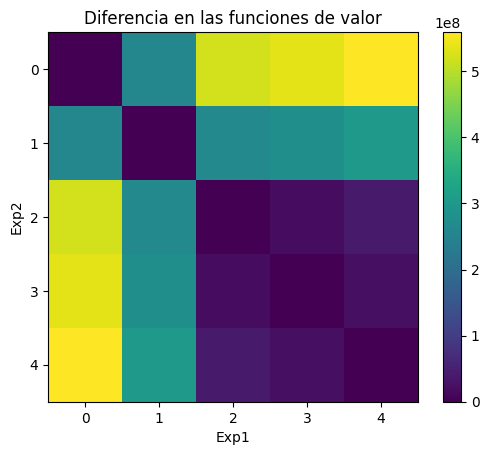

In [14]:

name_exp = "Exp1"
Qfun_model = "NN"
name = "results/"+ name_exp +"/SelfQfunDiff_" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".png"
diff_matrix = compare_Qfun_exp(env,qnet_exp,Qfun_model,name)

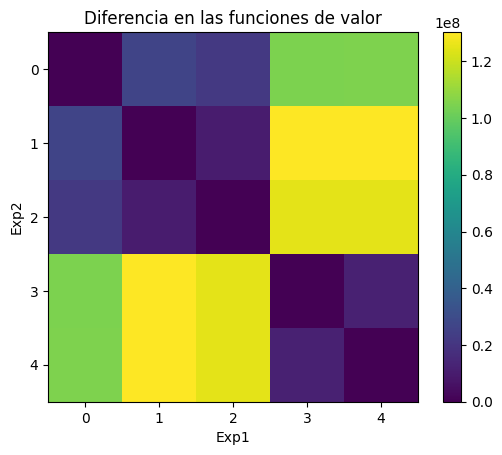

In [15]:
name_exp = "Exp1"
Qfun_model = "LR"
name = "results/"+ name_exp +"/SelfQfunDiff_" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".png"
diff_matrix = compare_Qfun_exp(env,qtensor_exp,Qfun_model,name)

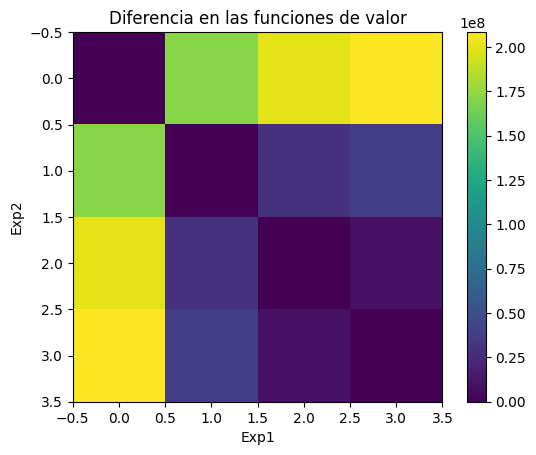

In [6]:
name_exp = "Exp1"
Qfun_model = "AG"
name = "results/"+ name_exp +"/SelfQfunDiff_" + Demand_Model + "_" + Qfun_model +"_" + Red_name +".png"
diff_matrix = compare_Qfun_exp(env,qnetAG_exp,"NN",name)